# Maps

In [1]:
import os
import obspy
import matplotlib.pyplot as plt
from vdapseisutils import VolcanoFigure
%matplotlib inline

radial_extent = 10  # kilometers
maxdepth = 20  # kilometers

hood = dict()
hood["coords"] = [45.374, -121.695, 3426]
hood["name"] = "Hood/Wy'East"
os.chdir("/home/jwellik/PYTHON/PKG/vdapseisutils")
cat_hood_msas = obspy.read_events("./data/catalog_hood_msas.xml", format="QUAKEML")


In [6]:
print("Make plots using VolcanoFigure: Mt Hood")

volc = hood
cat = cat_hood_msas

fig = VolcanoFigure(origin=(volc["coords"][0], volc["coords"][1]), depth_extent=(-5, 4), radial_extent_km=5.0)
fig.plot_catalog(cat, s="magnitude")
fig.add_arcgis_terrain()
# fig2.title("Mount Hood / Wy'East, Oregon")
# fig.catalog_subtitle(cat)
# fig2.magnitude_legend(cat)
fig.reftext("Jay Wellik (Volcano Disaster Assistance Program)")
# fig2.savefig("./output/Mapping_tutorial/VolcanoFigure_Hood.png")
fig.savefig('./gallery/test_map.png')
plt.show()


Make plots using VolcanoFigure: Mt Hood


/home/jwellik/miniconda3/envs/wav2hyp/lib/python3.12/site-packages/shapely/ops.py:259: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  shell = type(geom.exterior)(zip(*func(*zip(*geom.exterior.coords))))
/home/jwellik/miniconda3/envs/wav2hyp/lib/python3.12/site-packages/shapely/ops.py:259: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  shell = type(geom.exterior)(zip(*func(*zip(*geom.exterior.coords))))


Make plots using VolcanoFigure: Mt Hood


/home/jwellik/miniconda3/envs/vseis312d/lib/python3.12/site-packages/shapely/ops.py:276: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  shell = type(geom.exterior)(zip(*func(*zip(*geom.exterior.coords))))
/home/jwellik/miniconda3/envs/vseis312d/lib/python3.12/site-packages/shapely/ops.py:276: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  shell = type(geom.exterior)(zip(*func(*zip(*geom.exterior.coords))))


Done.


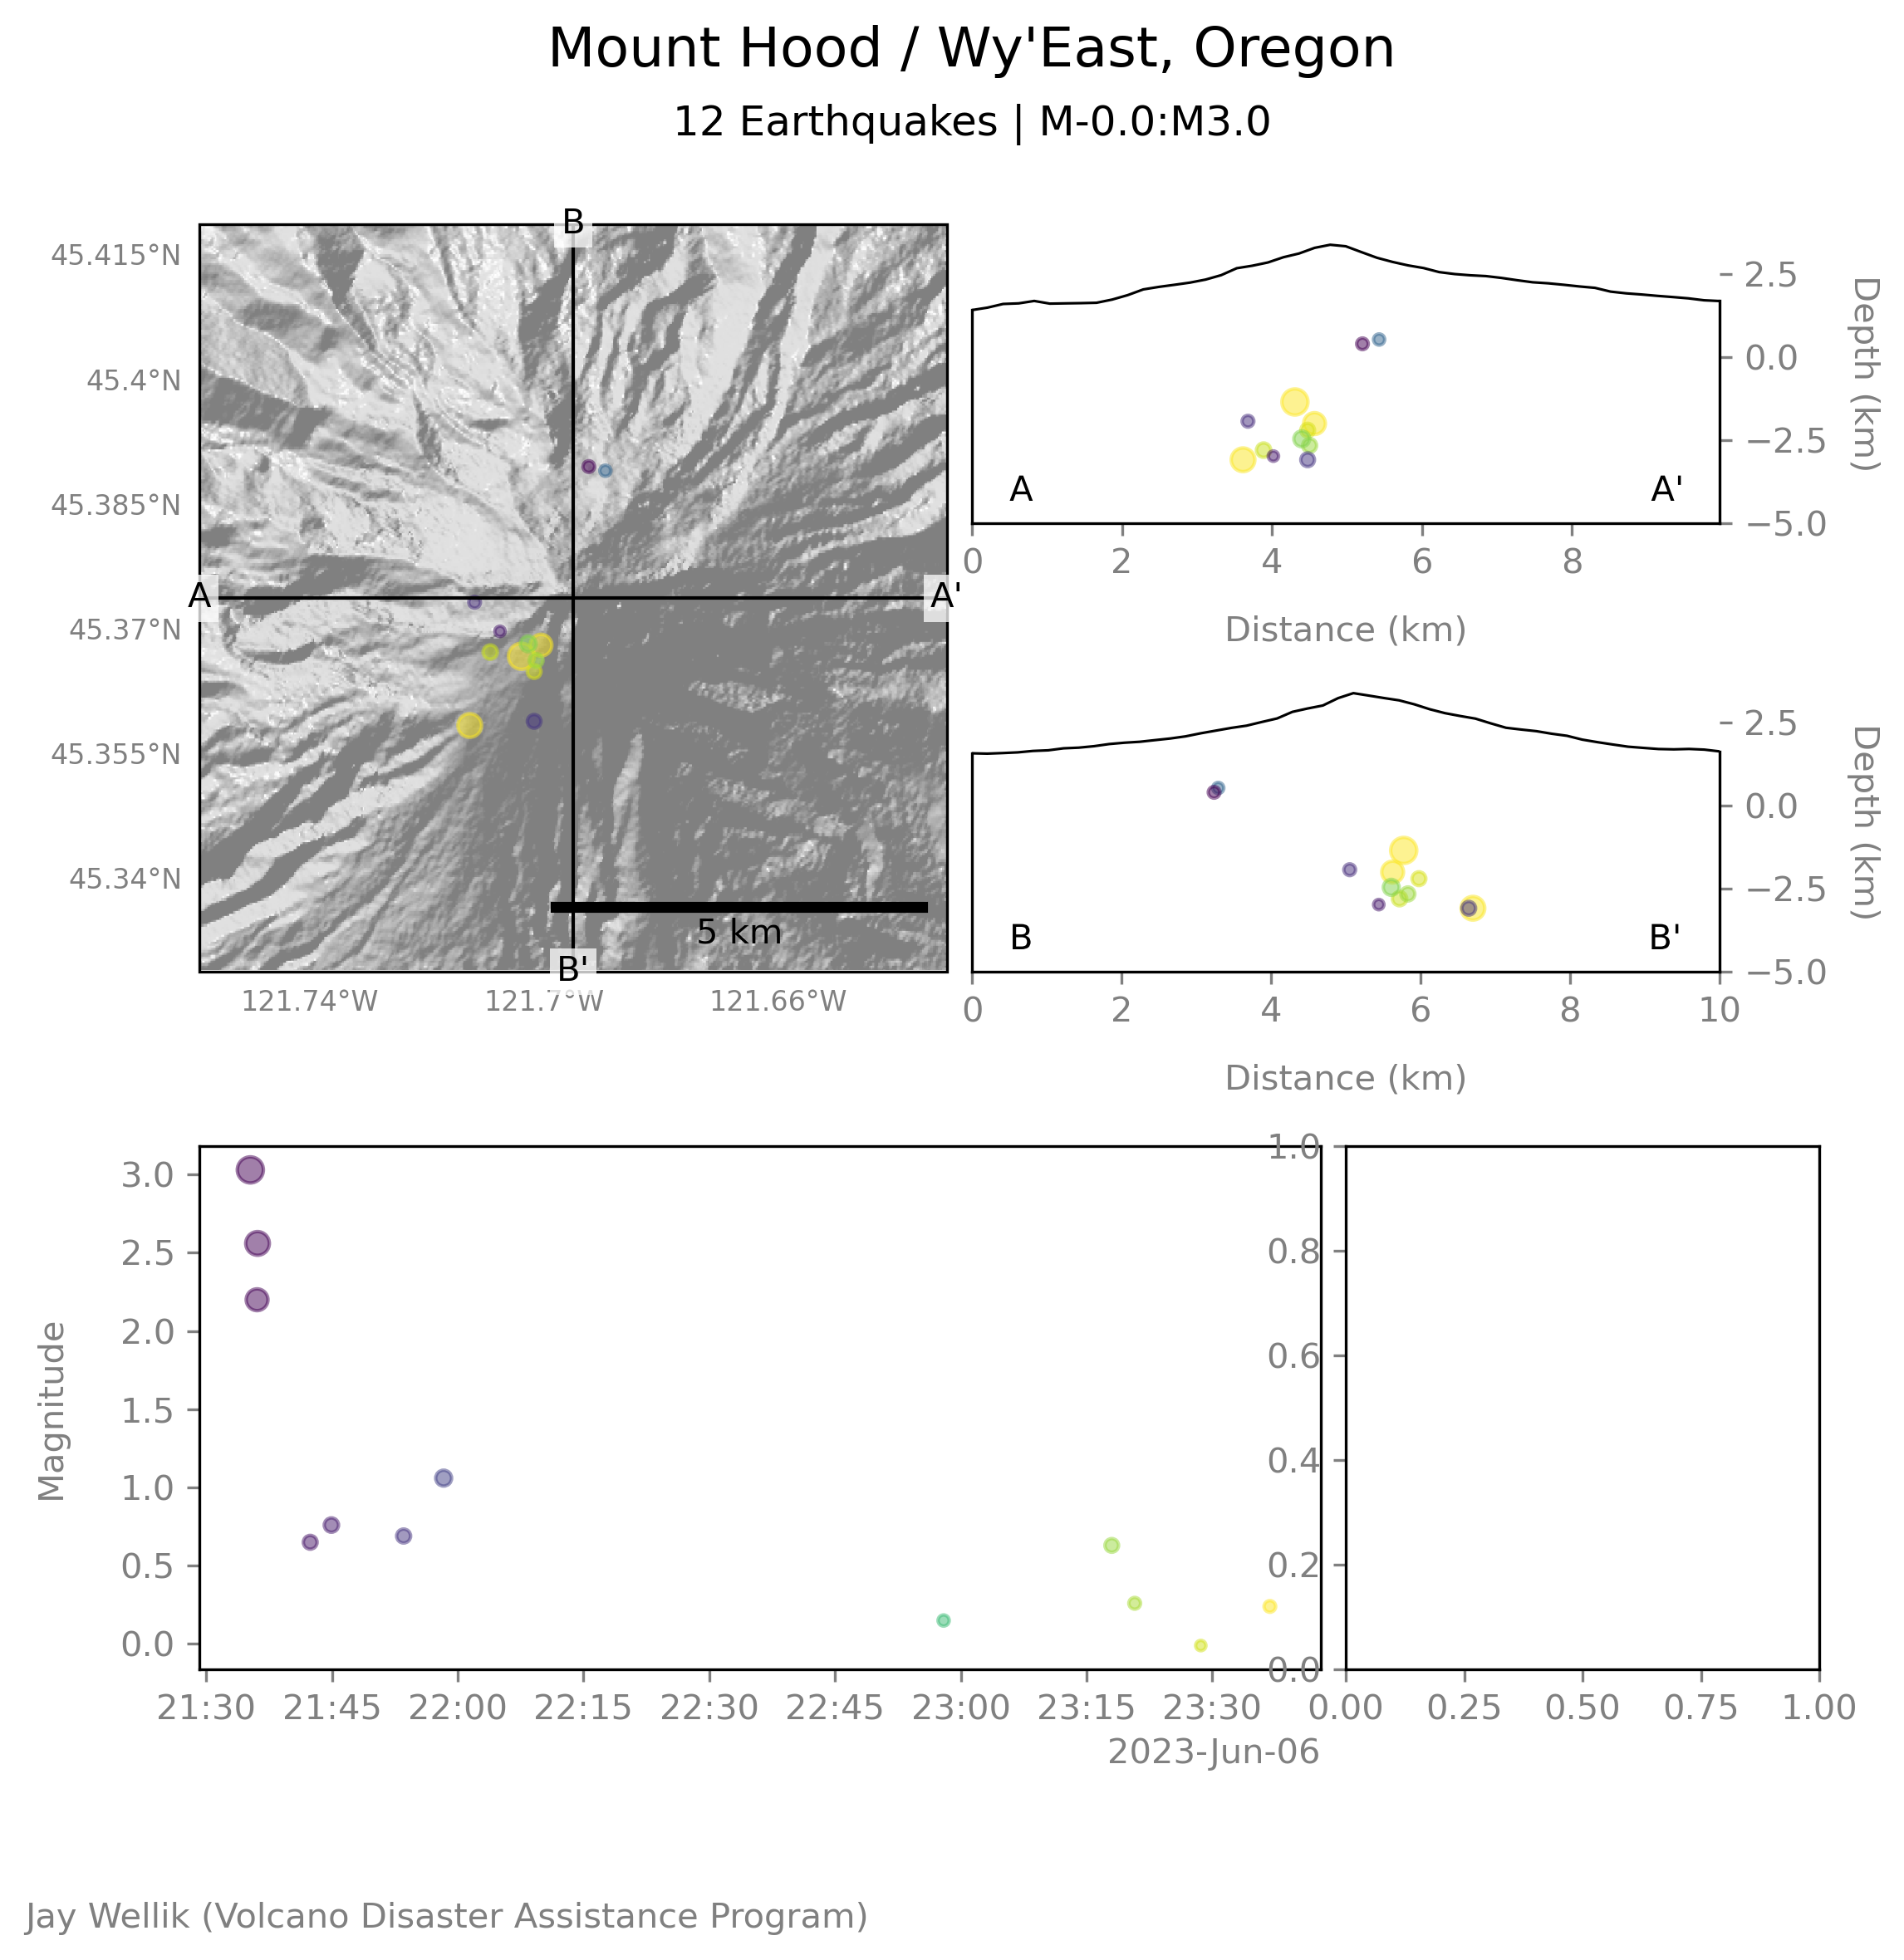

In [3]:
print("Make plots using VolcanoFigure: Mt Hood")
import cartopy.crs as ccrs

volc = hood
cat = cat_hood_msas

fig2 = plt.figure(figsize=(8, 8), dpi=300)  # width, height
fig2 = VolcanoFigure(fig=fig2, origin=(volc["coords"][0], volc["coords"][1]), depth_extent=(-5, 4), radial_extent_km=5.0, ts_axis_type="magnitude")
fig2.plot_catalog(cat, s="magnitude")
fig2.title("Mount Hood / Wy'East, Oregon")
fig2.catalog_subtitle(cat)

glv = fig2.axes[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0, color='gray', alpha=0.5, zorder=-10)
glv.top_labels = False
glv.bottom_labels = True
glv.left_labels = True
glv.right_labels = False
glv.xlines = True
glv.xlabel_style = {'size': 8, 'color': 'grey'}
glv.ylabel_style = {'size': 8, 'color': 'grey'}
fig2.axes[0].tick_params(axis='both', which='major', direction="out")


fig2.reftext("Jay Wellik (Volcano Disaster Assistance Program)")
# fig2.savefig("./output/Mapping_tutorial/VolcanoFigure_Hood.png")
plt.show()

ValueError: 'locs' must be 1D with shape (N,), but your input has shape ()

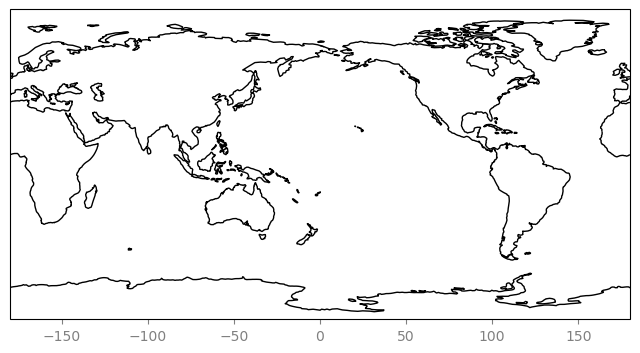

In [13]:
if True:
    from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter, LatitudeLocator, LongitudeLocator
    
    fig = plt.figure(figsize=(8, 10))

    # Label axes of a Plate Carree projection with a central longitude of 180:
    ax1 = fig.add_subplot(2, 1, 1,
                          projection=ccrs.PlateCarree(central_longitude=180))
    ax1.set_global()
    ax1.coastlines()
    # ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
    # ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_locator = LongitudeLocator(dms=True, nbins="auto")
    lat_locator = LatitudeLocator(dms=True, nbins="auto")
    ax1.set_xticks(lon_locator)
    ax1.set_yticks(lat_locator)

    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

NameError: name 'shape' is not defined

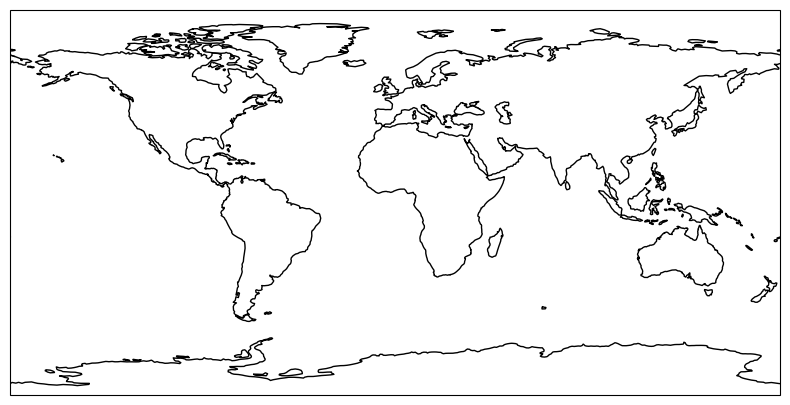

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import MaxNLocator

# Create a figure and an axis with a specific projection
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent of the map (longitude, latitude)
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Add coastlines for better visualization
ax.coastlines()

# Automatically set x-ticks and y-ticks using MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=False))  # For longitude
ax.yaxis.set_major_locator(MaxNLocator(integer=False))  # For latitude
# ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
# ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

# Set the tick parameters to place ticks on the outside
ax.tick_params(axis='both', direction='out', length=6)

# Optionally, you can remove gridlines
ax.grid(False)

# Show the plot
plt.show()